# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import toarray
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 2. Read the dataset

In [2]:
df = pd.read_csv("tweets.csv")

In [3]:
df

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...
...,...,...,...
395,396,Justin Trudeau,RT @googlecanada: Watch tmw: @JustinTrudeau di...
396,397,Justin Trudeau,"Today in Ottawa, I met with the Modern Treaty ..."
397,398,Justin Trudeau,Voici le sommaire de ma rencontre avec les Pre...
398,399,Justin Trudeau,RT @VeteransENG_CA: #Day1 of 11 Days of Rememb...


# 3. Split the dataset into X and y

In [4]:
y= df["author"]
x = df["status"]

# 4. Split the dataset into training set and testing set

In [5]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.25 , random_state=0)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [6]:
count_vec = CountVectorizer()

In [7]:
word_count_vec = count_vec.fit_transform(x_train)

In [8]:
testcount= count_vec.transform(x_test)

In [9]:
print(testcount.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(x_train)

In [11]:
testtfidf= vectorizer.transform(x_test)

In [12]:
print(testtfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [13]:
lcount=LogisticRegression()
ltfidf=LogisticRegression()

In [14]:
lcount.fit(word_count_vec,y_train)
ltfidf.fit(trsfm,y_train)

LogisticRegression()

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [15]:
scount = SVC()
stfidf = SVC()

In [16]:
scount.fit(word_count_vec,y_train)
stfidf.fit(trsfm,y_train)

SVC()

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [17]:
lcount_pred = lcount.predict(testcount)

In [18]:
ltfidf_pred = ltfidf.predict(testtfidf)

In [19]:
score_lgc = accuracy_score(y_test, lcount_pred)
score_lgc

0.88

In [20]:
score_lgt = accuracy_score(y_test, ltfidf_pred)
score_lgt

0.87

In [21]:
scount_pred = scount.predict(testcount)
stfidf_pred = stfidf.predict(testtfidf)

In [22]:
score_sc = accuracy_score(y_test, scount_pred)
score_sc

0.86

In [23]:
score_st = accuracy_score(y_test, stfidf_pred)
score_st

0.88

# 9. Plot a confusion matrix for both Logistic Regression and SVM

In [24]:
lcount_cm = confusion_matrix(y_test, lcount_pred)
ltfidf_cm = confusion_matrix(y_test, ltfidf_pred)
scount_cm = confusion_matrix(y_test, scount_pred)
stfidf_cm = confusion_matrix(y_test, stfidf_pred)

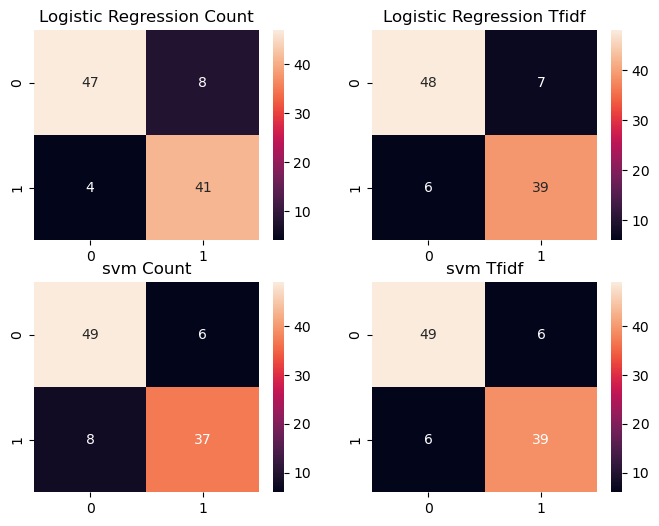

In [25]:
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.heatmap(lcount_cm, annot = True);
plt.title('Logistic Regression Count')

plt.subplot(2, 2, 2)
sns.heatmap(ltfidf_cm, annot = True);
plt.title('Logistic Regression Tfidf')

plt.subplot(2, 2, 3)
sns.heatmap(scount_cm, annot = True)
plt.title('svm Count')

plt.subplot(2, 2, 4)
sns.heatmap(stfidf_cm, annot = True);
plt.title('svm Tfidf')


plt.show()